In [ ]:
%matplotlib inline

In [8]:
basedir='/home/rms101/SCRIPTS/cfc/'
import sys
sys.path.append('/home/rms101/PMODS')
import os
import cmipdata as cd
import numpy as np
import matplotlib.pyplot as plt # for basic plotting
import rms_plots as rpl
import rms_utils as rut
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
################settings
#mpl.style.reload_library()
#plt.style.use('rms_paper')


1a. Calculate GM annual mean TAS timeseries LE
#####################################################

In [9]:
rundir=basedir;os.chdir(rundir)
srcdir_base1='//space/hall4/sitestore/eccc/crd/ccrn/users/cmr203/ncconv/netcdfconv/'
srcdir_base2='//space/hall3/sitestore/eccc/crd/ccrn/users/ccc103/'    
datadir='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/DATA/cfc_post'

do_calc=False
varnm='tas'
if do_calc:
    os.system('mkdir -p {}/DATA_{}_canesm5_scenario'.format(datadir,varnm))
    os.chdir('{}/DATA_{}_canesm5_scenario'.format(datadir,varnm))
    os.system('/bin/rm *.nc')
    # ssp126 
    os.system('ln -s ' + srcdir_base1 +'/final/CMIP6/ScenarioMIP/*/CanESM5/ssp119/r*i1p*f1/Amon/tas/*/*/*.nc .')
    # ssp126 
    os.system('ln -s ' + srcdir_base1 +'/final/CMIP6/ScenarioMIP/*/CanESM5/ssp126/r*i1p*f1/Amon/tas/*/*/*.nc .')
    # ssp245 
    os.system('ln -s ' + srcdir_base1 +'/final/CMIP6/ScenarioMIP/*/CanESM5/ssp245/r*i1p*f1/Amon/tas/*/*/*.nc .')
    # ssp370 
    os.system('ln -s ' + srcdir_base1 +'/final/CMIP6/ScenarioMIP/*/CanESM5/ssp370/r*i1p*f1/Amon/tas/*/*/*.nc .')    
    # ssp585 
    os.system('ln -s ' + srcdir_base1 +'/final/CMIP6/ScenarioMIP/*/CanESM5/ssp585/r*i1p*f1/Amon/tas/*/*/*.nc .')    
    
    # concat
    ens_ssp11 = rut.cd_mkensemble('*ssp11*',mip='cmip6')
    ens_ssp11 = cd.cat_exp_slices(ens_ssp11)
    ens_ssp12 = rut.cd_mkensemble('*ssp12*',mip='cmip6')
    ens_ssp12 = cd.cat_exp_slices(ens_ssp12)
    ens_ssp2 = rut.cd_mkensemble('*ssp2*',mip='cmip6')
    ens_ssp2 = cd.cat_exp_slices(ens_ssp2)
    ens_ssp3 = rut.cd_mkensemble('*ssp3*',mip='cmip6')
    ens_ssp3 = cd.cat_exp_slices(ens_ssp3)
    ens_ssp5 = rut.cd_mkensemble('*ssp5*',mip='cmip6')
    ens_ssp5 = cd.cat_exp_slices(ens_ssp5)

    print 'Calculate global annual mean'
    # annual means            
    my_cdo_str='cdo -yearmean -seldate,2015-01-01,2065-12-31 {infile} {outfile}' 
    ens_ssp11 =cd.my_operator(ens_ssp11, my_cdo_str, output_prefix='am_',delete=True)
    ens_ssp12 =cd.my_operator(ens_ssp12, my_cdo_str, output_prefix='am_',delete=True)
    ens_ssp2 =cd.my_operator(ens_ssp2, my_cdo_str, output_prefix='am_',delete=True)
    ens_ssp3 =cd.my_operator(ens_ssp3, my_cdo_str, output_prefix='am_',delete=True)
    ens_ssp5 =cd.my_operator(ens_ssp5, my_cdo_str, output_prefix='am_',delete=True)
    # global mean            
    my_cdo_str='cdo -fldmean {infile} {outfile}'     
    ens_ssp11_gm =cd.my_operator(ens_ssp11, my_cdo_str, output_prefix='gm',delete=False)
    ens_ssp12_gm =cd.my_operator(ens_ssp12, my_cdo_str, output_prefix='gm',delete=False)
    ens_ssp2_gm =cd.my_operator(ens_ssp2, my_cdo_str, output_prefix='gm',delete=False)    
    ens_ssp3_gm =cd.my_operator(ens_ssp3, my_cdo_str, output_prefix='gm',delete=False)
    ens_ssp5_gm =cd.my_operator(ens_ssp5, my_cdo_str, output_prefix='gm',delete=False)    
    # arctic mean                
    my_cdo_str='cdo -fldmean  -sellonlatbox,0,360,60,90 {infile} {outfile}' 
    ens_ssp11_arc =cd.my_operator(ens_ssp11, my_cdo_str, output_prefix='arc',delete=False)
    ens_ssp12_arc =cd.my_operator(ens_ssp12, my_cdo_str, output_prefix='arc',delete=False)
    ens_ssp2_arc =cd.my_operator(ens_ssp2, my_cdo_str, output_prefix='arc',delete=False)
    ens_ssp3_arc =cd.my_operator(ens_ssp3, my_cdo_str, output_prefix='arc',delete=False)
    ens_ssp5_arc =cd.my_operator(ens_ssp5, my_cdo_str, output_prefix='arc',delete=False)    
else:
    os.chdir('{}/DATA_{}_canesm5_scenario'.format(datadir,varnm))  
    ens_ssp11_gm=rut.cd_mkensemble('gmam*_ssp11*',prefix='gmam_',mip='cmip6')
    ens_ssp12_gm=rut.cd_mkensemble('gmam*_ssp12*',prefix='gmam_',mip='cmip6')    
    ens_ssp2_gm=rut.cd_mkensemble('gmam*_ssp2*',prefix='gmam_',mip='cmip6')    
    ens_ssp3_gm=rut.cd_mkensemble('gmam*_ssp3*',prefix='gmam_',mip='cmip6')    
    ens_ssp5_gm=rut.cd_mkensemble('gmam*_ssp5*',prefix='gmam_',mip='cmip6')

    ens_ssp11_arc=rut.cd_mkensemble('arcam*_ssp11*',prefix='arcam_',mip='cmip6')
    ens_ssp12_arc=rut.cd_mkensemble('arcam*_ssp12*',prefix='arcam_',mip='cmip6')
    ens_ssp2_arc=rut.cd_mkensemble('arcam*_ssp2*',prefix='arcam_',mip='cmip6')
    ens_ssp3_arc=rut.cd_mkensemble('arcam*_ssp3*',prefix='arcam_',mip='cmip6')
    ens_ssp5_arc=rut.cd_mkensemble('arcam*_ssp5*',prefix='arcam_',mip='cmip6')

tas_ssp11_gm =cd.loadfiles(ens_ssp11_gm,'tas')['data']
tas_ssp12_gm =cd.loadfiles(ens_ssp12_gm,'tas')['data']
tas_ssp2_gm =cd.loadfiles(ens_ssp2_gm,'tas')['data']
tas_ssp3_gm =cd.loadfiles(ens_ssp3_gm,'tas')['data']
tas_ssp5_gm =cd.loadfiles(ens_ssp5_gm,'tas')['data']

tas_ssp11_arc =cd.loadfiles(ens_ssp11_arc,'tas')['data']
tas_ssp12_arc =cd.loadfiles(ens_ssp12_arc,'tas')['data']
tas_ssp2_arc =cd.loadfiles(ens_ssp2_arc,'tas')['data']
tas_ssp3_arc =cd.loadfiles(ens_ssp3_arc,'tas')['data']
tas_ssp5_arc =cd.loadfiles(ens_ssp5_arc,'tas')['data']

os.chdir(rundir)

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more 

In [10]:
years=np.arange(2015,2065+1)
#### Trends GM and ARC
#ssp11
nens_ssp11=np.shape(tas_ssp11_gm)[0]
dtas_ssp11_gm=np.zeros((nens_ssp11,1)) 
dtas_ssp11_arc=np.zeros((nens_ssp11,1))

for i in range(nens_ssp11):
    dtas_ssp11_gm[i]=np.polyfit(years,tas_ssp11_gm[i,:],1)[0]*(2065-2015)
    dtas_ssp11_arc[i]=np.polyfit(years,tas_ssp11_arc[i,:],1)[0]*(2065-2015)

#ssp12
nens_ssp12=np.shape(tas_ssp12_gm)[0]
dtas_ssp12_gm=np.zeros((nens_ssp12,1)) 
dtas_ssp12_arc=np.zeros((nens_ssp12,1))

for i in range(nens_ssp12):
    dtas_ssp12_gm[i]=np.polyfit(years,tas_ssp12_gm[i,:],1)[0]*(2065-2015)
    dtas_ssp12_arc[i]=np.polyfit(years,tas_ssp12_arc[i,:],1)[0]*(2065-2015)

#ssp2
nens_ssp2=np.shape(tas_ssp2_gm)[0]
dtas_ssp2_gm=np.zeros((nens_ssp2,1)) 
dtas_ssp2_arc=np.zeros((nens_ssp2,1))

for i in range(nens_ssp2):
    dtas_ssp2_gm[i]=np.polyfit(years,tas_ssp2_gm[i,:],1)[0]*(2065-2015)
    dtas_ssp2_arc[i]=np.polyfit(years,tas_ssp2_arc[i,:],1)[0]*(2065-2015)

#ssp3
nens_ssp3=np.shape(tas_ssp3_gm)[0]
dtas_ssp3_gm=np.zeros((nens_ssp3,1)) 
dtas_ssp3_arc=np.zeros((nens_ssp3,1))

for i in range(nens_ssp3):
    dtas_ssp3_gm[i]=np.polyfit(years,tas_ssp3_gm[i,:],1)[0]*(2065-2015)
    dtas_ssp3_arc[i]=np.polyfit(years,tas_ssp3_arc[i,:],1)[0]*(2065-2015)
    
#ssp5
nens_ssp5=np.shape(tas_ssp5_gm)[0]
dtas_ssp5_gm=np.zeros((nens_ssp5,1)); 
dtas_ssp5_arc=np.zeros((nens_ssp5,1))

for i in range(nens_ssp5):
    dtas_ssp5_gm[i]=np.polyfit(years,tas_ssp5_gm[i,:],1)[0]*(2065-2015)
    dtas_ssp5_arc[i]=np.polyfit(years,tas_ssp5_arc[i,:],1)[0]*(2065-2015)

 

Arctic Amplification
SSP11: 3.79
SSP12: 3.07
SSP2: 2.61
SSP3: 2.47
SSP5: 2.44


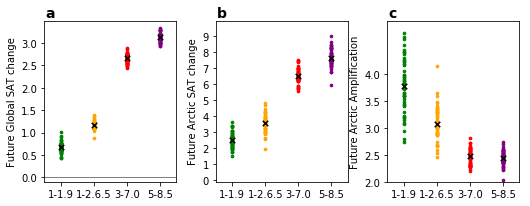

In [12]:
#### Plot trends
fig1, axs = plt.subplots(1,3, figsize=(8,8)); 
fig1.subplots_adjust(bottom=0.6,right=0.95,hspace=0.3,wspace=0.3)
##global
ax=axs[0]
rpl.add_title(ax,'','a')
ax.set_xlim([0.5, 4.5]) 
ax.set_xticks(np.arange(1,4+1))
ax.set_xticklabels(['1-1.9','1-2.6.5','3-7.0','5-8.5'])

ax.set_ylim([-0.1, 3.5]) 
ax.set_yticks(np.arange(0,3.5,0.5))
ax.set_ylabel('Future Global SAT change')

ax.axhline(y=0,color="black",linewidth=0.5)

ax.scatter(np.ones(nens_ssp11),dtas_ssp11_gm.squeeze(),7,'green')
ax.scatter(1,np.mean(dtas_ssp11_gm),30,'black','x')

ax.scatter(np.ones(nens_ssp12)*2,dtas_ssp12_gm.squeeze(),7,'orange')
ax.scatter(2,np.mean(dtas_ssp12_gm),30,'black','x')

ax.scatter(np.ones(nens_ssp3)*3,dtas_ssp3_gm.squeeze(),7,'red')
ax.scatter(3,np.mean(dtas_ssp3_gm),30,'black','x')

ax.scatter(np.ones(nens_ssp5)*4,dtas_ssp5_gm.squeeze(),7,'purple')
ax.scatter(4,np.mean(dtas_ssp5_gm),30,'black','x')


##arc
ax=axs[1]
rpl.add_title(ax,'','b')
ax.set_xlim([0.5, 4.5]) 
ax.set_xticks(np.arange(1,4+1))
ax.set_xticklabels(['1-1.9','1-2.6.5','3-7.0','5-8.5'])

ax.set_ylim([-0.1, 10]) 
ax.set_yticks(np.arange(0,10,1))
ax.set_ylabel('Future Arctic SAT change')

ax.scatter(np.ones(nens_ssp11),dtas_ssp11_arc.squeeze(),7,'green')
ax.scatter(1,np.mean(dtas_ssp11_arc),30,'black','x')

ax.scatter(np.ones(nens_ssp12)*2,dtas_ssp12_arc.squeeze(),7,'orange')
ax.scatter(2,np.mean(dtas_ssp12_arc),30,'black','x')

ax.scatter(np.ones(nens_ssp3)*3,dtas_ssp3_arc.squeeze(),7,'red')
ax.scatter(3,np.mean(dtas_ssp3_arc),30,'black','x')

ax.scatter(np.ones(nens_ssp5)*4,dtas_ssp5_arc.squeeze(),7,'purple')
ax.scatter(4,np.mean(dtas_ssp5_arc),30,'black','x')



##AA
ax=axs[2]
rpl.add_title(ax,'','c')
ax.set_xlim([0.5, 4.5]) 
ax.set_xticks(np.arange(1,4+1))
ax.set_xticklabels(['1-1.9','1-2.6.5','3-7.0','5-8.5'])

ax.set_ylim([2, 5]) 
ax.set_yticks(np.arange(2,4.5,0.5))
ax.set_ylabel('Future Arctic Amplification')

ax.axhline(y=0,color="black",linewidth=0.5)

ax.scatter(np.ones(nens_ssp11),(dtas_ssp11_arc/dtas_ssp11_gm).squeeze(),7,'green')
ax.scatter(1,np.mean(dtas_ssp11_arc/dtas_ssp11_gm),30,'black','x')

ax.scatter(np.ones(nens_ssp12)*2,(dtas_ssp12_arc/dtas_ssp12_gm).squeeze(),7,'orange')
ax.scatter(2,np.mean(dtas_ssp12_arc/dtas_ssp12_gm),30,'black','x')

ax.scatter(np.ones(nens_ssp3)*3,(dtas_ssp3_arc/dtas_ssp3_gm).squeeze(),7,'red')
ax.scatter(3,np.mean(dtas_ssp3_arc/dtas_ssp3_gm),30,'black','x')

ax.scatter(np.ones(nens_ssp5)*4,(dtas_ssp5_arc/dtas_ssp5_gm).squeeze(),7,'purple')
ax.scatter(4,np.mean(dtas_ssp5_arc/dtas_ssp5_gm),30,'black','x')

rpl.mysavefig(fig1,'fig2_tas_trends_scenario.png')

##Numbers

print 'Arctic Amplification'
print 'SSP11: '+"%4.2f"%(np.mean(dtas_ssp11_arc/dtas_ssp11_gm))
print 'SSP12: '+"%4.2f"%(np.mean(dtas_ssp12_arc/dtas_ssp12_gm))
print 'SSP2: '+"%4.2f"%(np.mean(dtas_ssp2_arc/dtas_ssp2_gm))
print 'SSP3: '+"%4.2f"%(np.mean(dtas_ssp3_arc/dtas_ssp3_gm))
print 'SSP5: '+"%4.2f"%(np.mean(dtas_ssp5_arc/dtas_ssp5_gm))





__Arctic Amplification__

- From historical simulations we saw that aerosol cooling is 4.3 times more effective in the Arctic compared to the global mean, whereas GHG warming is only 2.6 times more effective in the Arctic compared to the global mean, implying that reducing aerosols reduced AA.

- This implies that in future scenarios with decreasing aerosols, AA will increase

- This is confirmed here








    